<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [48]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [49]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
min(data['MEDV'])

5.0

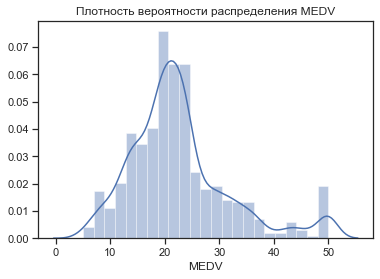

In [51]:
MEDV = data['MEDV']
sns.distplot(MEDV)
plt.title('Плотность вероятности распределения MEDV')
plt.show()

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



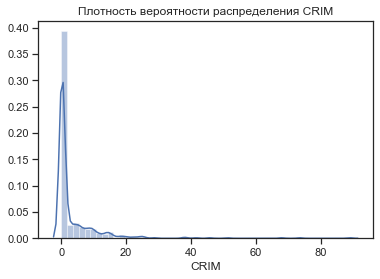

In [52]:
CRIM = data['CRIM']
sns.distplot(CRIM)
plt.title('Плотность вероятности распределения CRIM')
plt.show()

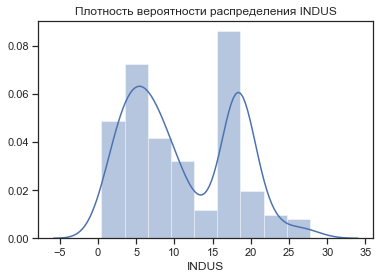

In [53]:
INDUS = data['INDUS']
sns.distplot(INDUS)
plt.title('Плотность вероятности распределения INDUS')
plt.show()

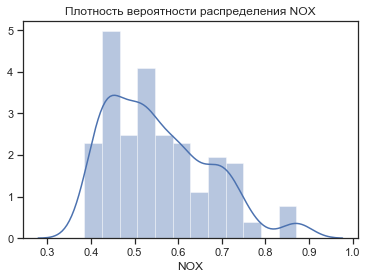

In [54]:
NOX = data['NOX']
sns.distplot(NOX)
plt.title('Плотность вероятности распределения NOX')
plt.show()

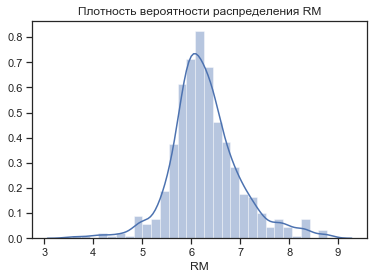

In [55]:
RM = data['RM']
sns.distplot(RM)
plt.title('Плотность вероятности распределения RM')
plt.show()

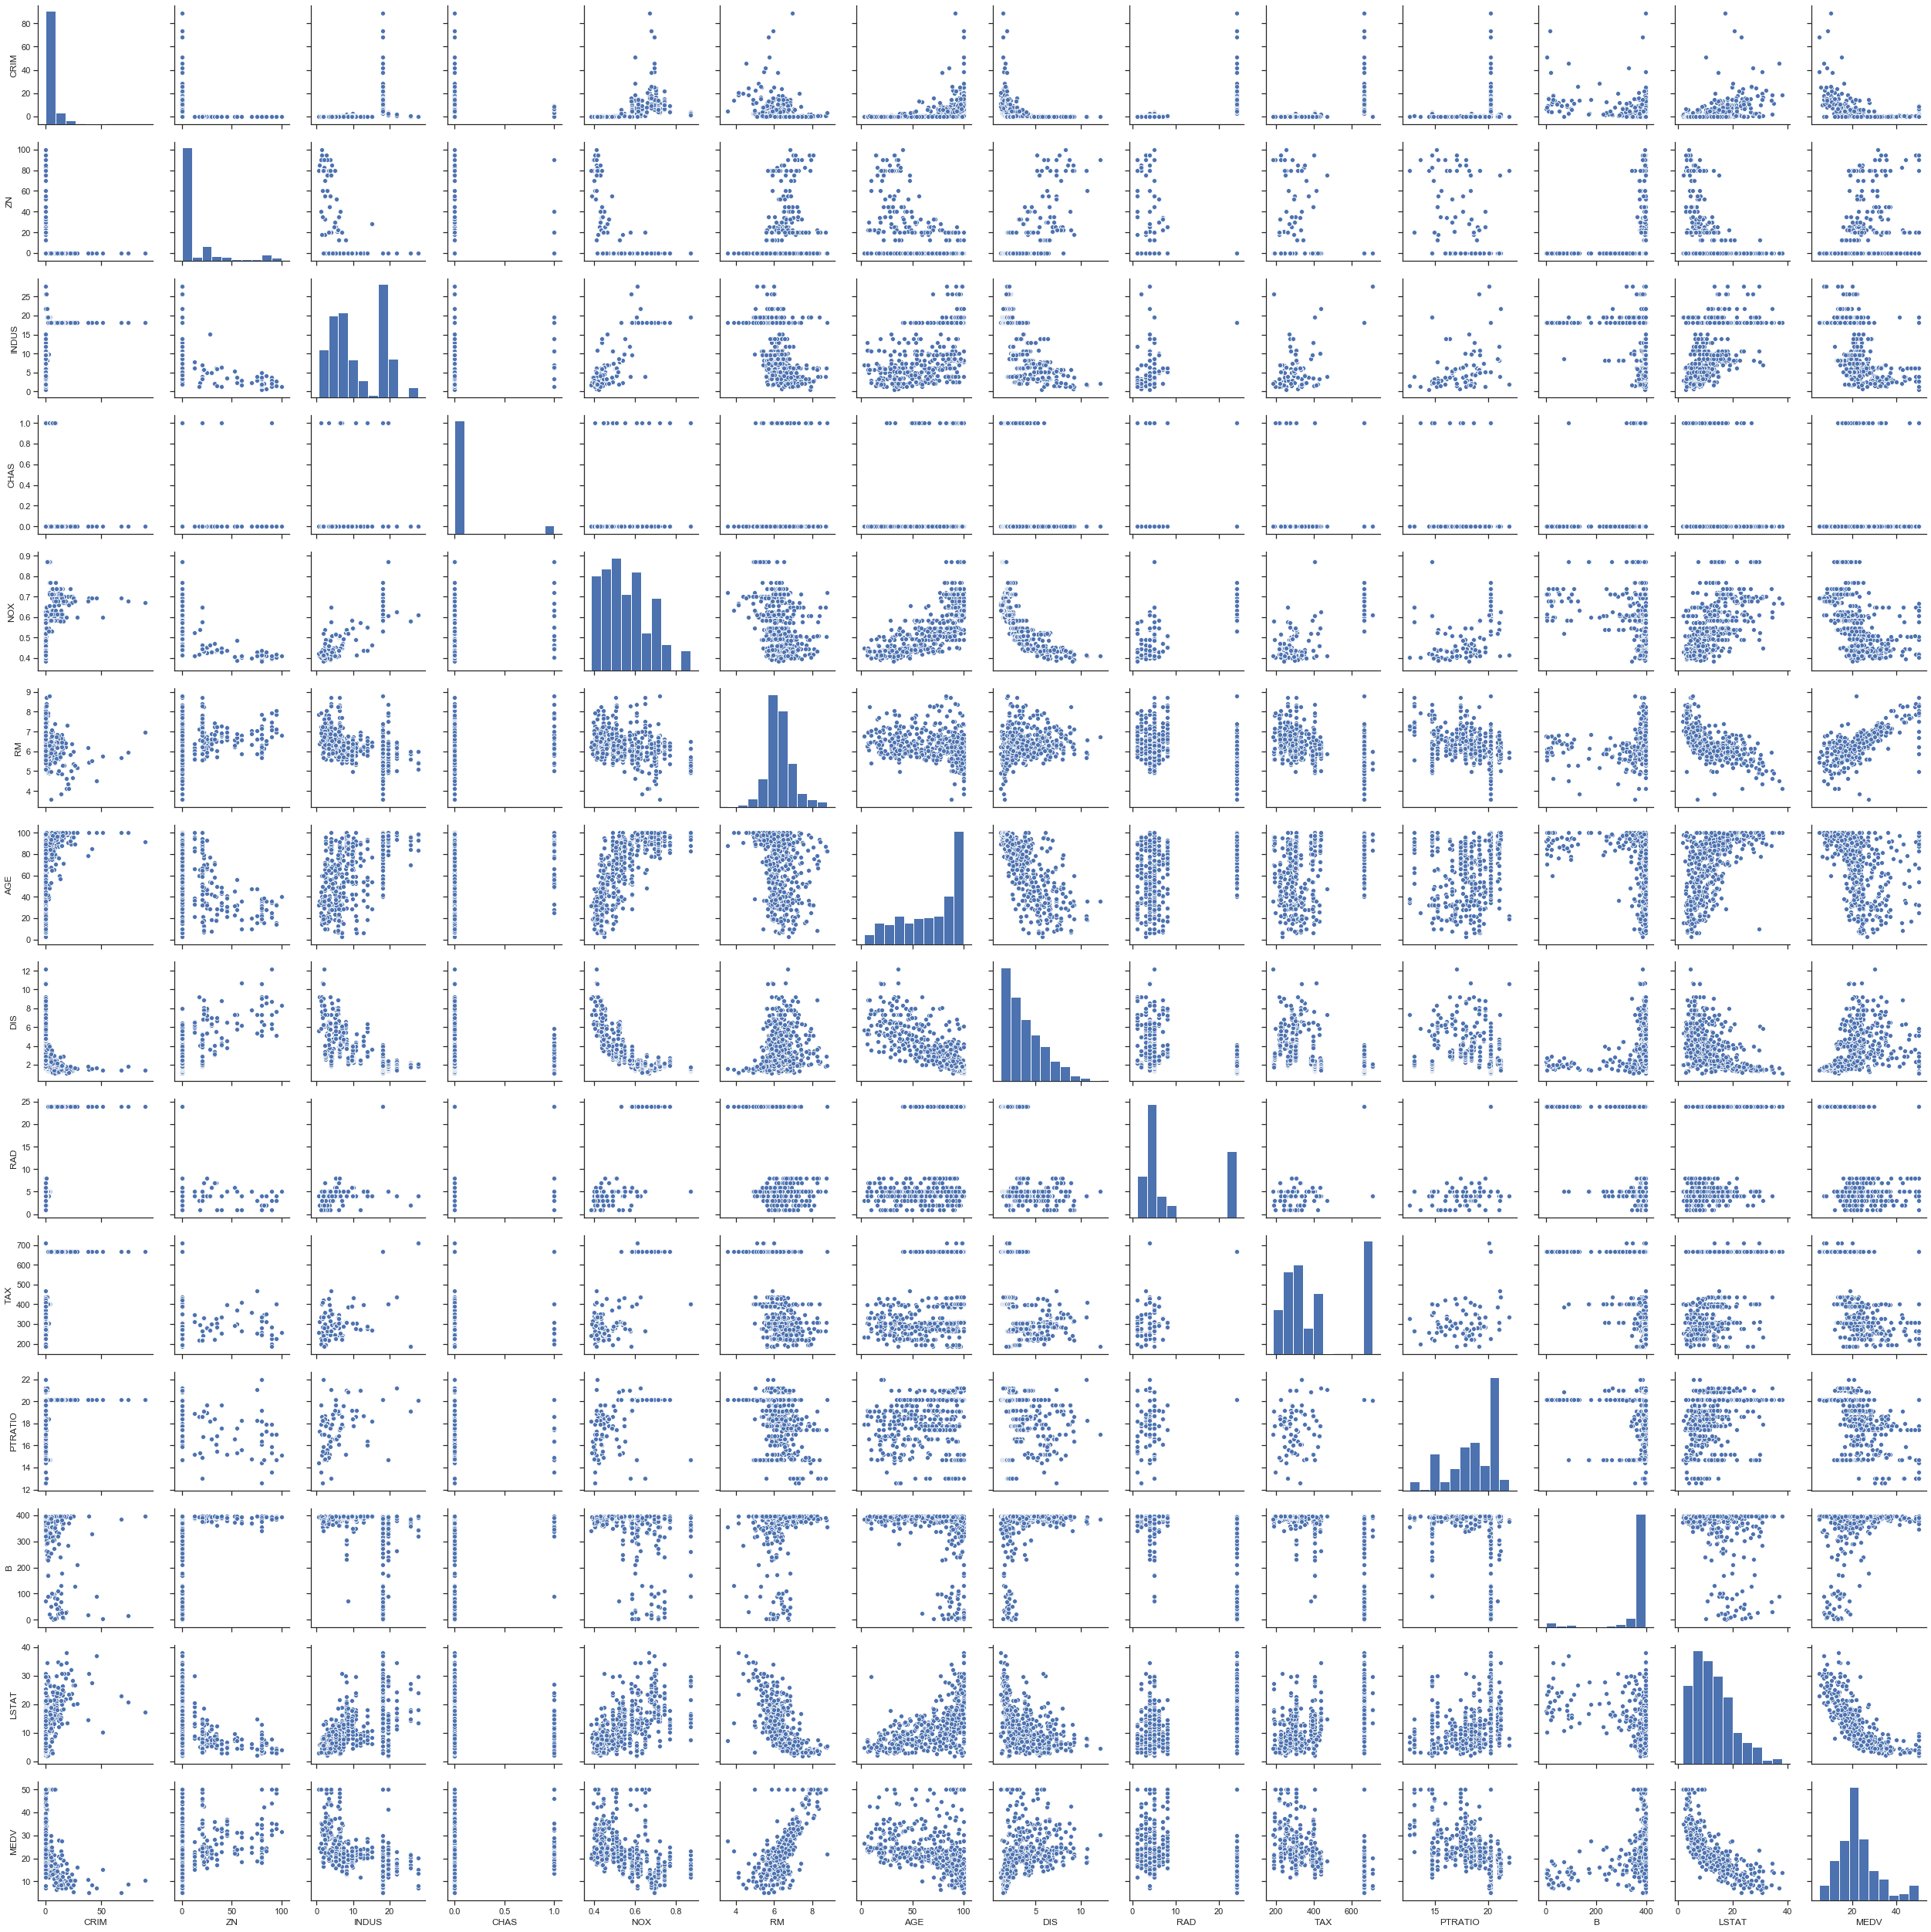

In [56]:
sns.set(style="ticks", color_codes=True)
#iris = sns.load_dataset("iris")
g = sns.pairplot(data)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

In [61]:
data['MEDV'].fillna(0, inplace = True)
data['LSTAT'].fillna(0, inplace = True)

In [62]:
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

In [73]:
min(lstat)

array([1.73])

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2,
    random_state = 3
)

In [65]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
predicted_y = model.predict(X_test)

In [67]:
model.score(X_test, y_test)


0.5663680841829948

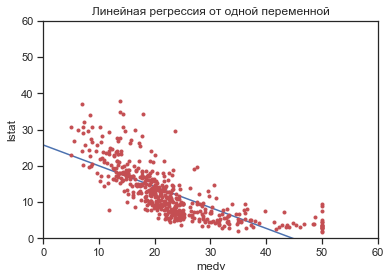

In [97]:
plt.xlabel('medv')
plt.ylabel('lstat')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 10 точек для предсказаний
x = np.linspace(0, 60, 10)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(medv, lstat, 'r.')
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()

In [184]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [185]:
data.rename(columns ={'Country (region)':'country'}, inplace =True) 
data.head()

,country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [186]:
data.loc[data.country == None, 'country'].count()

0

Сколько стран в выборке? Написать ответ. 

In [187]:
len(data['country'])

156

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [188]:
data['continent']=""
data.head()

,country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,


In [189]:

url=pd.ExcelFile('spr.xlsx')
spr=pd.read_excel(url,'spr')
spr.head()

,Country,Continent
0,Mauritius,Africa
1,Libya,Africa
2,Nigeria,Africa
3,Algeria,Africa
4,Morocco,Africa


In [191]:
    #for k in spr['Country']:
        #print(k)

In [194]:
b=0
for c in data['country']:
    a=0
    for k in spr['Country']:
        
        if c == k:
            
            

            data.loc[b,'continent']= spr.loc[a,'Continent']
            
            break
        else:               
            a+=1
            
    b+=1        
data.head()       

,country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Euroasia
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Euroasia
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Euroasia
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Euroasia
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Euroasia


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


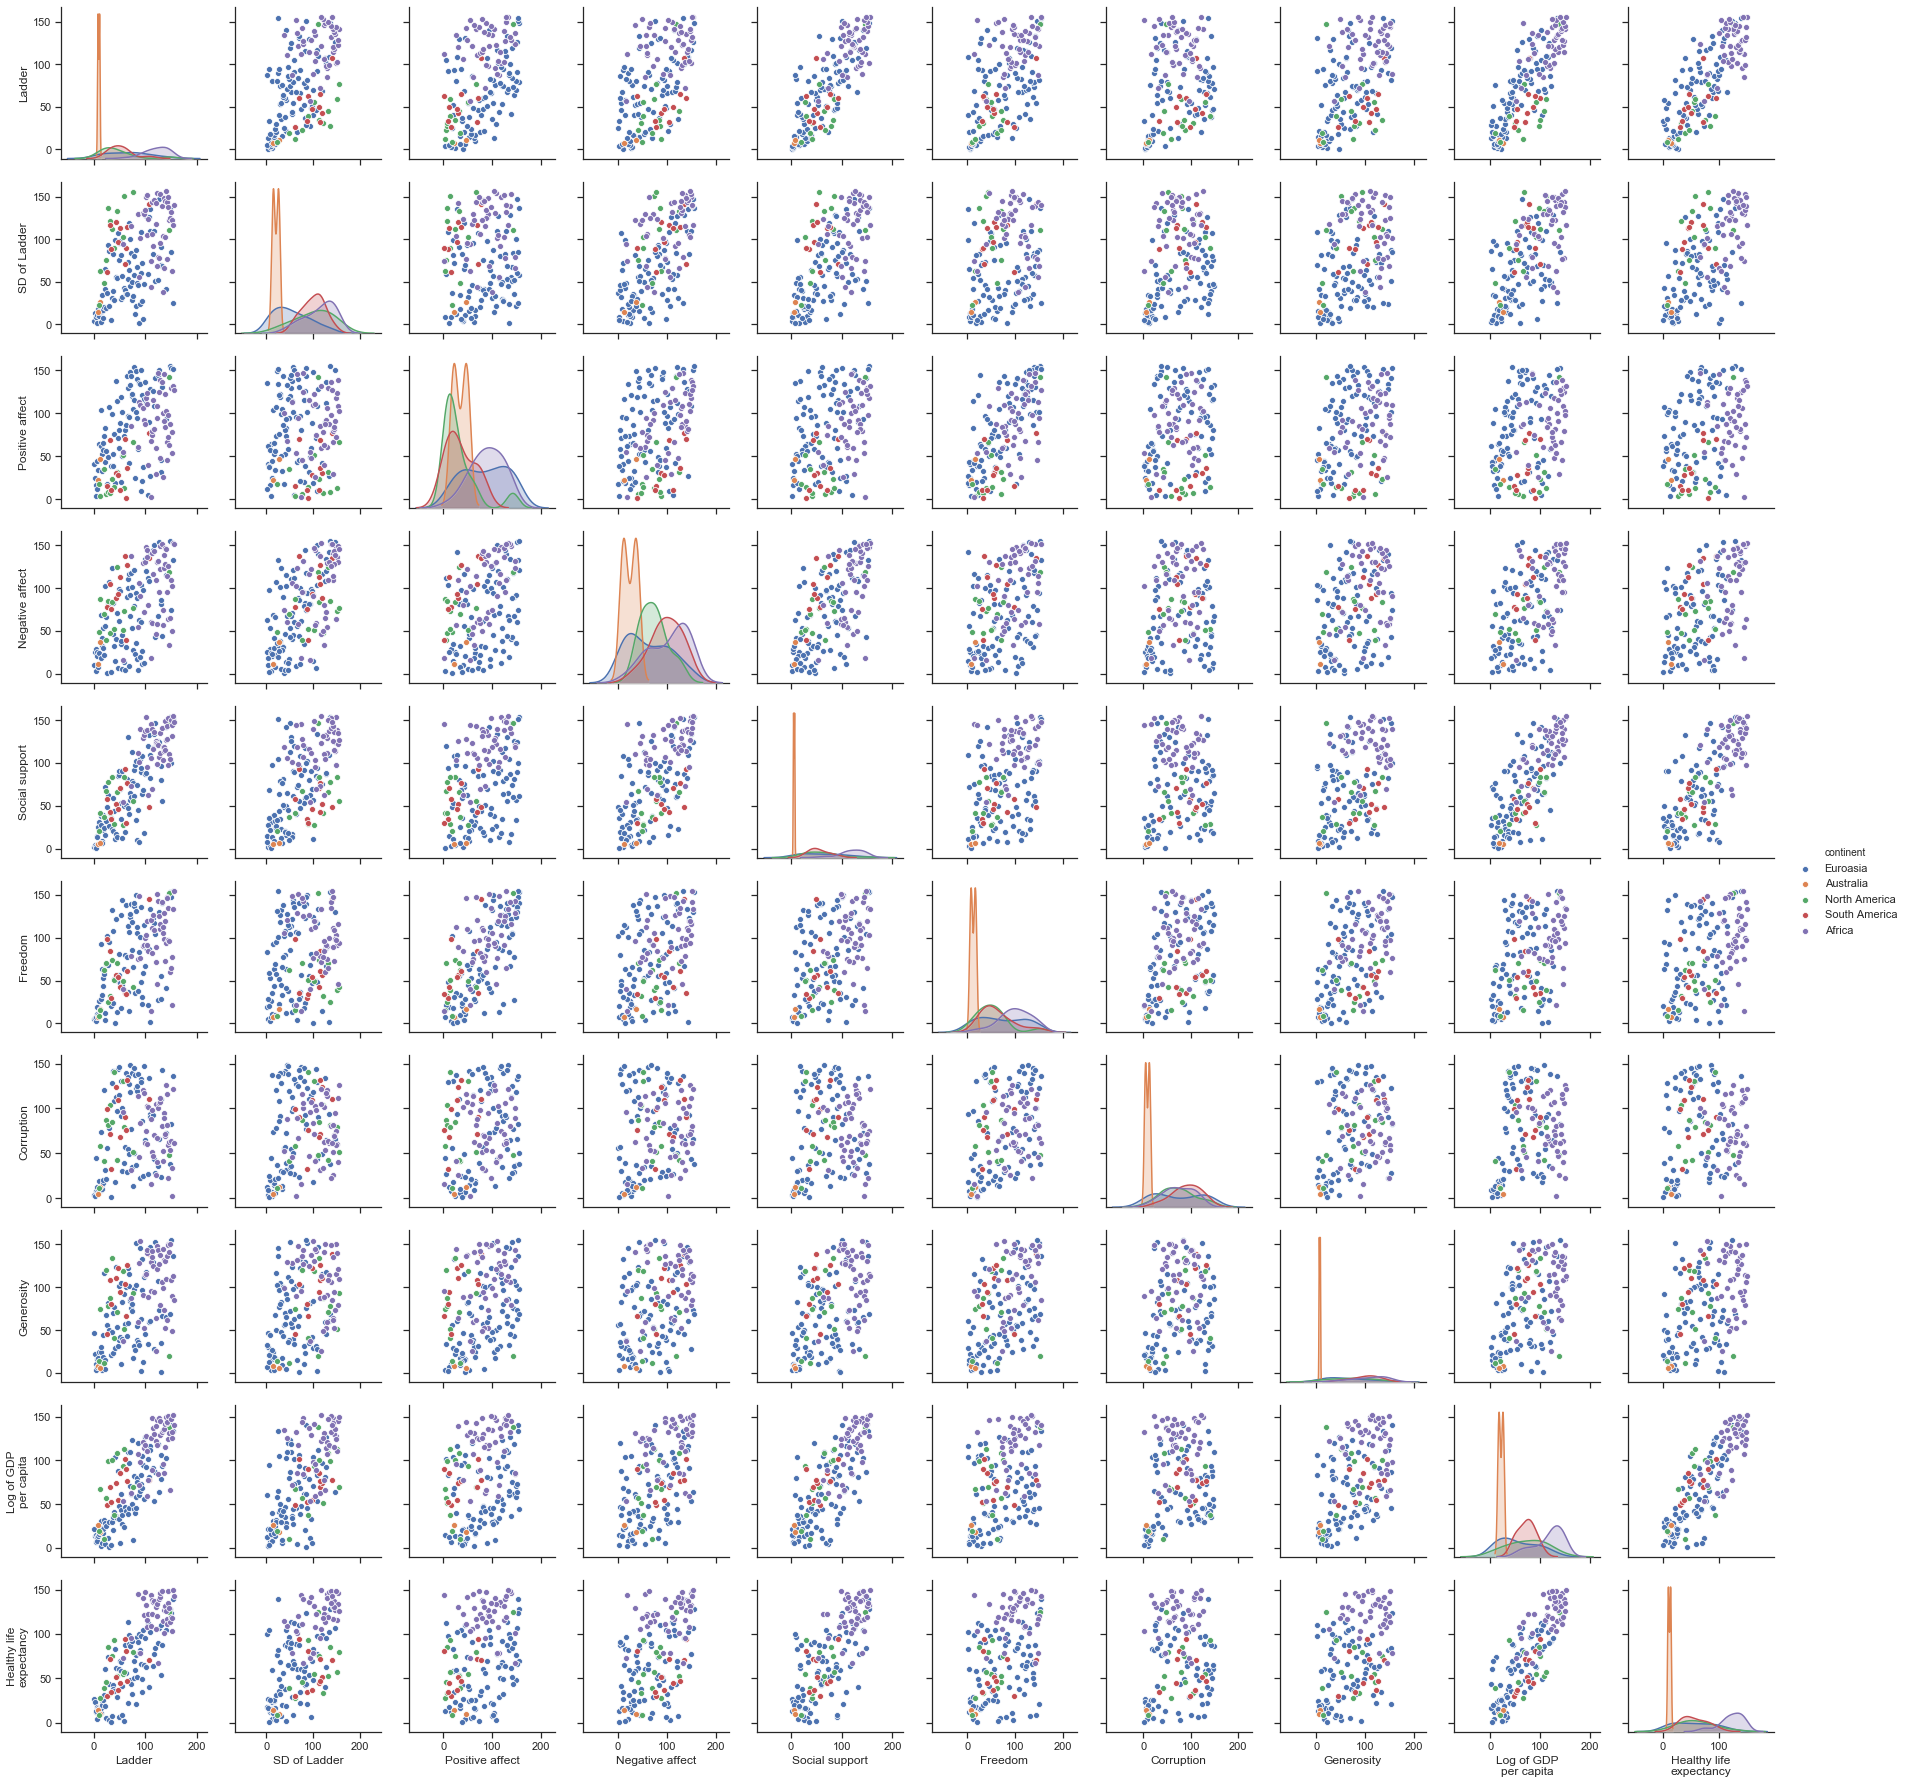

In [201]:
sns.set(style="ticks", color_codes=True)
#dd = sns.load_dataset("data")
g = sns.pairplot(data, hue='continent')

# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

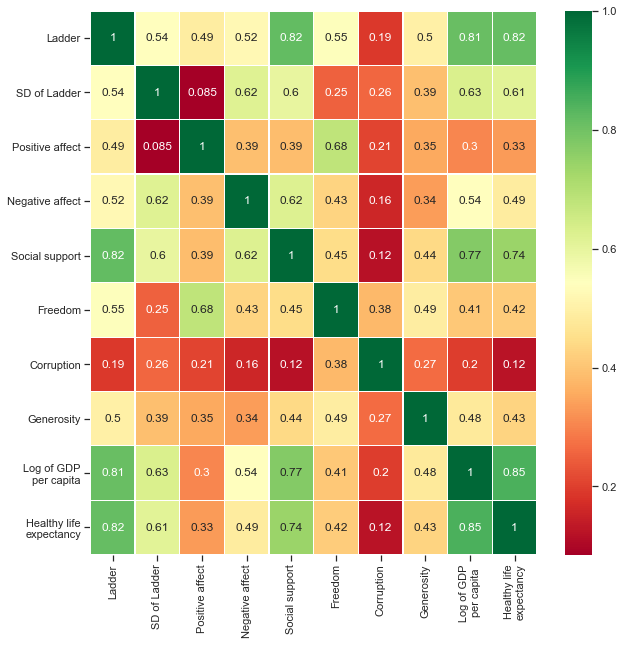

In [203]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

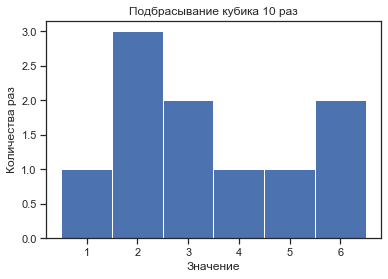

In [209]:
import pylab

# Количество испытаний
trials = 10

# Массив значений
values = np.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

[3478 3433 3454 3658 3494 3595 3512 3469 3546 3521 3657 3554 3459 3431
 3495 3472 3487 3481 3411 3576 3512 3509 3473 3412 3500 3518 3569 3464
 3478 3448 3539 3566 3529 3442 3467 3559 3415 3474 3491 3541 3523 3471
 3539 3542 3544 3500 3537 3456 3469 3538 3573 3470 3491 3511 3465 3565
 3517 3541 3451 3501 3446 3475 3503 3452 3490 3455 3528 3472 3456 3483
 3438 3489 3451 3512 3474 3476 3483 3500 3511 3573 3576 3476 3436 3516
 3462 3549 3472 3492 3493 3450 3617 3675 3515 3463 3447 3422 3396 3495
 3487 3495]


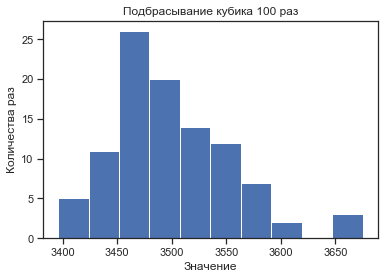

In [236]:
# Количество испытаний
trials = 100

# Массив значений



values = np.random.randint(1, 7, size=trials)

a=values

for i in range(1,1000):
    values = np.random.randint(1, 7, size=trials)
    a=a+values

print (a)


pylab.hist(a, edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()